*This notebook is particularly designed for Youtube Academic Projects Series by Spartificial Innovations Pvt Ltd. However, anyone is allowed to use it, who is interested in understanding applications of Machine Learning through real world projects.*       
*Please contact team@spartificial.com or visit https://spartificial.com/ to know more.*         

# <center> Modeling of Neutron Star using Numerical Method

---

**Project ID: MNS-0323**      

**Project Name: Modelling of Neutron Star**

---



<center> <img src = "https://universe.nasa.gov/internal_resources/471/supernova.gif" width = 75%>

## Workflow of this notebook
**1)** [Introducing Neutron Stars](#h1)          
**2)** [Problem Statement](#h2)        
**3)** [Plank System of Units](#h3)           
**4)** [Define useful functions](#h4)     
**5)** [Setting up the Similation Parameters](#h5)    
**6)** [Modeling a Neutron Star](#h6)         
**7)** [Conclusions](#h7)       


## Introducing Neutron Stars <a name = 'h1'><a>

Imagine a star, like our own sun, but with a difference. Instead of the fiery nuclear reactions at its core keeping it shining, this star has already exhausted all of its fuel. It has burned through everything that could sustain its energy.  When a massive star runs out of fuel, it can no longer sustain the nuclear reactions that keep it from collapsing under its own gravity. The core of the star collapses, and the outer layers are expelled in a spectacular explosion called a supernova.

<img src = 'https://cdn.britannica.com/92/124492-050-047F11FB/image-Kepler-Nova-Keplers-Supernova-Chandra-X-ray.jpg' width = 65%>  

Isn't it just beautiful? Well, it's as violent too! During this explosion, the temperature and pressure reach unimaginable levels, and elements heavier than iron are formed. The shock wave from the explosion compresses the core to an extreme density, causing protons and electrons to combine and form neutrons. This results in a compact object made almost entirely of neutrons, hence the name neutron star.

 <img src = 'https://cdn.mos.cms.futurecdn.net/7BHv7n2L3KJNuRgDDbaJVf-1200-80.jpg' width = 65%>  

To give you an idea, imagine taking the entire mass of the sun and squeezing it into a sphere the size of a city. That's the kind of density we're talking about! Neutron stars are incredibly dense, but they are also incredibly small. Despite having a mass greater than the sun, they are only about few  kilometers in diameter. Due to their high density, they also have a strong gravitational pull. In fact, their gravitational pull is so strong that they can bend and distort light, causing a phenomenon known as gravitational lensing.

<img src = 'https://static.wikia.nocookie.net/starfrontiers/images/0/0a/Neutron_Star_Lenticular_Gravity_Effect.jpg/revision/latest?cb=20140820154427' width = 65%>

Despite their small size, neutron stars can spin at an astonishing rate, sometimes hundreds of times per second! As they spin, they emit beams of radiation that can be detected on Earth, making them some of the most interesting objects in the universe to study. In fact, neutron stars are so fascinating that they continue to capture the imagination of scientists and astronomers alike, offering an unparalleled opportunity to learn about the most extreme conditions in the universe. And that's exactly what we are going to do here by modeling a neutron star!

<img src = 'https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fblogs-images.forbes.com%2Fstartswithabang%2Ffiles%2F2019%2F02%2Fghirlanda1HR-1200x742.jpg' width = 65%>


## Problem Statement <a name = 'h2'><a>

We will be modeling a neutron star using the numerical method known as Runge-Kutta 4th order (RK4) on the Hydrostatic Equilibrium and TOV (Tolman-Oppenheimer-Volkoff) equations for the classical and relativistic model respectively. Don't worry if these fancy words are scarying you! Let's get a gist of each one of them.


#### <mark>Runge-Kutta</mark>

<img src = 'https://slopefield.files.wordpress.com/2016/03/runge-kutta.png?w=663' width = 35%>

- Runge-Kutta is a family of numerical methods that are used to solve ordinary differential equations (ODEs) and systems of ODEs.

- It uses iterative steps to approximate the solution of an ODE at a given point in time.

- The method involves breaking the ODE down into smaller, more manageable steps, and then using an iterative process to approximate the solution at each step.

- It is one of the most commonly used numerical methods for solving ODEs, as it provides a good balance between accuracy and computational efficiency.

- Hence, we shall also try and use it for our problem statement. We will peek more into RK4 and it's equations later while we code for it.

#### <mark>Hydrostatic Equilibrium and TOV Equations</mark>

<img src='http://www.daviddarling.info/images/hydrostatic_equilibrium.jpg' width = 35%>

- So we know that RK4 method is used to solve ODEs and system of ODEs. So which ODEs are we going to solve in this project? Well, that's where Hydrostatic and TOV equations come into the picture.

- They are fundamental concepts in modeling a neutron star which describe how the forces of gravity and pressure balance each other out, allowing a neutron star to maintain its size and shape.

- While both approaches aim to model the structure of a neutron star, hydrostatic equilibrium is a classical approach that assumes the star is in hydrostatic equilibrium (pressure gradient within the star balances the gravitational force), while the TOV equations are derived from general relativity and take into account relativistic effects.

- We shall glance over this topic a bit more to understand their equations when we will code it later in this notebook.

## Plank System Units <a name = 'h3'><a>

<img src = 'https://i.ytimg.com/vi/nCMuPjN8Uh8/maxresdefault.jpg' width = 45%>

- The Planck system of units is a system of natural units based on fundamental physical constants, such as the speed of light, Planck's constant, and the gravitational constant. In this system, these constants are set to the value of 1, which allows for easier and more meaningful comparison between different physical quantities.

- Also the value of 4π is set to 1, along with the other constants mentioned above. For example, in the hydrostatic equilibrium equation, the 4π term is commonly used to account for the total solid angle of the sphere, but in the Planck system, it simplifies to just 1.

- Hence, using the Planck system of units, many physical constants and equations can be simplified and expressed in a more elegant and compact form. We shall use this system of units for this project.

- It is often used in theoretical physics and cosmology, particularly in areas related to quantum gravity and the study of the early universe.

## Defining the Functions <a name = 'h4'><a>

We shall now understand and build multiple functions that will be used in this project.

In [ ]:
# Import necessary Libraries to get started
import numpy as np               # we will need a lot of arrays in this project
import matplotlib.pyplot as plt  # for visualising the results

#### **1) Initial number densisty of a neutron star**

- The initial number density of a neutron star refers to the number of neutrons per unit volume at the very beginning of the star's formation.

-  By specifying the initial number density, scientists can model the structure of the star and understand how its physical properties, such as mass, radius, and internal composition, evolve over time.

- The function uses the Newton-Raphson method to solve the equation that determines the value of "n". The equation for this is obtained by substituting the expressions for pressure and energy density from the TOV equation into the equation of hydrostatic equilibrium.

- The equation is in the form of a nonlinear algebraic equation and cannot be solved analytically. Therefore, the Newton-Raphson method is used to iteratively find the value of "n" that satisfies the equation.

**Equation to be used in Newton Raphson Method:-**      
$f(n) = {236.n^{2.54} + n.m_n - \rho_s}$       
$f'(n) = 236 \times 2.54 \times n^{1.54} + m_n$

**Newton Raphson Method:-**          
$n_{i+1} = n_i - \frac{f(n_i)}{f'(n_i)}$

In [ ]:
def initial_n():

    '''Initial number of neutrons per unit volume at r = 0'''

    n = 1                                   # Initial value of n
    err = 1                                 # Inital Error
    tol = 1e-15                             # Tolerance Value
    count = 0                               # To track total iterations for convergence

    # Newton-Raphson method
    while err > tol :                       # Untill convergence of n
        count += 1                          # Increment the count of the iteration
        fn = 236*n**(2.54) + n*mn - rho_s   # Find f(n_old)
        dfn = 236*2.54*n**(1.54) + mn       # Find f'(n_old)
        temp = n - fn/dfn                   # Calculate n_new using Newton Raphson Method
        err = np.abs(n-temp)                # Calculate the error
        n = temp                            # Use this n value in next iteration for f(n_old), f'(n_old)
    print("Newton-Raphson Converged after ", count, "iterations")
    return n

#### **2) Energy density $ρ$ of the neutron star given the pressure**
- This function will be used to calculate the energy density (ρ) of the neutron star given the pressure (p) at a particular point. It uses the TOV equation to determine the relationship between pressure and energy density.

- The first step in the function is to calculate the number density (n) of the neutron star using the input pressure (p) and the known values of the neutron mass (mn) and the nuclear central density ($\rho_s$). The equation used for this is:

- $n = (\frac{p.\rho_s}{363.44})^{(1/2.54)}$

- Once the number density is known, the energy density can be calculated using the TOV equation:

- ${\rho(p) = \frac{236.n^{2.54} + n.m_n}{\rho_s}}$

This equation relates the energy density ($\rho$) to the number density (n) and neutron mass (mn). The function then returns the calculated energy density.

In [ ]:
def rho(p):

    '''
    Energy Density of a neutron star at a given pressure
    rho_s - Central Density at r = 0
    mn - mass of a neutron
    n - number density at given pressure
    '''

    n = (p*rho_s/363.44)**(1/2.54)
    return (236. * n**2.54 + n *mn)/rho_s

#### **3) Classical and Relativistic Models for calculating the Pressure Gradient**

**Classical Model**         
- The classical model is used to describe the equilibrium structure of the star.

- The classical model is based on the hydrostatic equilibrium equation, which relates the pressure gradient force to the gravitational force inside the star.

- The classical model assumes that the star is composed of non-interacting, non-relativistic particles, and neglects the effects of special and general relativity on the star's matter.

- The equation for pressure gradient in the classical model is as follows:         
<img src = 'https://drive.google.com/uc?id=1Yg078cufyoiXDZfbcQj0zUlY7MlCGyDW' width = 11%>      

- However, as we are using Planck system units, $G = 1$. Hence, this equation now becomes:     
$\frac{dP}{dr} = -\frac{mρ}{r^2}$

**Relativisitc Model**
- TOV equations can be a useful starting point for understanding the basic structure of a neutron star, since they provide a framework for calculating the properties of a spherically symmetric, non-rotating, and a relativistic neutron star, such as its mass, radius, and central density.

- Hence, we shall use the TOV equation for the pressure gradient calculation for the relativistic model:
<img src = 'https://drive.google.com/uc?id=10IB-8MbkWUb-OJjI1JQF0HyNhtnYIgrA' width = 23%>

- However, as we are using Plank system units, $G = c = 4\pi = 1$. Thus, this equation now becomes:        
$\frac{dP}{dr} = -\frac{(\rho + P)(m + Pr^3)}{r^2 - 2mr}$


**NOTE:-**     
- At the center of a neutron star, that is when r = 0, the denominator for both the above equations will become 0. Hence, to avoid this we will add a small value in the denominator to each equation, 1 $\times$ 10$^{-20}$.

- Also, we will use a flag in this function to access the classical model if it is set to 0 else if it is set to 1 then it shall access the relativistic model.









In [ ]:
def dp_dr(r,m,p,flag):

    '''
    Pressure Gradient
    r - distance from the center of neutron star
    m - mass enclosed within the value of r
    p - pressure at that value of r
    flag - choose between classical and relativistic models
    '''

    if flag == 0:
        # Classical Model
        y = -m*rho(p)/(r**2 + 1e-20)

    else:
        # Relativistic Model
        y = -(p+rho(p))*(m + p*r**3)/(r**2 - 2*m*r + 1e-20)

    return y

#### **4) Calculating the Mass Gradient**      
-  It calculates the change in mass enclosed within a radius r, with respect to the change in radius r, at a given pressure p.

- Hence, the equation of the mass gradient equation that gives the rate of change of mass with respect to radius, based on the density profile of the star:      
<img src = 'https://drive.google.com/uc?id=1aaS7lqDApFC-m7rhc8lOSxGYTHLNxYmL' width = 10%>     

- Keeping in mind the Planck system units, this equation now becomes:        
$\frac{dm}{dr} = r^2\rho$

In [ ]:
def dm_dr(r,m,p):

    '''
    Mass Gradient
    Same r, m, p as we used for pressure gradient are to be used for mass gradient
    '''

    return rho(p)*r**2

**Reference:-**        
- You can check [this material](https://www.ictp-saifr.org/schoolgr/Lecture2Creighton.pdf) to go through the idea of classical and relativistic equations for pressure and mass gradients.

##### **5) Runge-Kutta 4th order Solver for a system of two ODEs**      

<img src = 'https://qph.cf2.quoracdn.net/main-qimg-0a4499ac8d33ca2f010549de27d2093d' width = 35%>

- Two system of ODEs that we have for this problem is the pressure and mass gradient equations that we saw above. Both the equations were the functions of r, m and P.

- Now, the idea is to solve these equations numerically using RK4 method to get the values of P and m at respective values of r.

- We must have initial conditions for r for which m and P are defined to get started with RK4 sovler as it calculates the next values of m and P dependent on the previous value that is some h units next to the initial r, that is, new values of m and P will be then calculated on $r_{new} = r_{old} + h.$

- The value of $h$ determines the total steps to be performed in RK4 solver. For example, if $r_{0} = 0$ and $r_{1} = 0.4$ and if you choose the value of h to be 0.2 then it would take 2 steps to go from r = 0 to r = 0.4.

- The concept is that in order to go from $r_{old}$ to $r_{new}$ RK4 calculates four different gradients, namely, $k_{11}$, $k_{12}$, $k_{13}$, $k_{14}$ for m and $k_{21}$, $k_{22}$, $k_{23}$, $k_{24}$ for P.

- The way these gradients and updation step of m and P are calulated are through the following equations:-

 **Gradient Calculations for m and P:-**     
  - $k_{11} = \frac{dm}{dr}(r, m, P)$     
  $k_{21} = \frac{dP}{dr}(r, m, P)$

  - $k_{12} = \frac{dm}{dr}(r+0.5h, m+0.5hk_{11}, P+0.5hk_{21})$  
  $k_{22} = \frac{dP}{dr}(r+0.5h, m+0.5hk_{11}, P+0.5hk_{21})$  

  - $k_{13} = \frac{dm}{dr}(r+0.5h, m+0.5hk_{12}, P+0.5hk_{22})$  
  $k_{23} = \frac{dP}{dr}(r+0.5h, m+0.5hk_{12}, P+0.5hk_{22})$  

  - $k_{14} = \frac{dm}{dr}(r+h, m+hk_{13}, P+hk_{23})$  
  $k_{24} = \frac{dP}{dr}(r+h, m+hk_{13}, P+hk_{23})$  

  **Updation Step for m and P:-**
  - $m_{new} = m_{old} + \frac{h}{6}(k_{11} + 2k_{12} + 2k_{13} + k_{14})$
  - $P_{new} = P_{old} + \frac{h}{6}(k_{21} + 2k_{22} + 2k_{23} + k_{24})$

- We need to keep on updating m and P for the desired number of steps or until the solution has reached a desired value of r.

**Desmos output shown in the video can be accessed via [this link](https://www.desmos.com/calculator/2wnqyu4rur).**

In [ ]:
def RK4Solver(r,m,p,h,flag):

    '''
    Runge - Kutta 4th order Method
    Calculates 4 different pressure and mass gradients
    K1_ - Mass Gradients
    K2_ - Pressure Gradients
    '''
    y = np.zeros(2)                                               # To store the next value of m and p

    # Gradient 1 at start point
    k11 = dm_dr(r, m, p)
    k21 = dp_dr(r, m, p, flag)

    # Gradient 2 at mid of start and end point
    k12 = dm_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h)
    k22 = dp_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h, flag)

    # Gradient 3 at mid of start and end point
    k13 = dm_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h)
    k23 = dp_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h, flag)

    # Gradient 4 at end point
    k14 = dm_dr(r + h, m + k13*h, p + k23*h)
    k24 = dp_dr(r + h, m + k13*h, p + k23*h, flag)

    # Updation of m and p
    y[0] = m + h*(k11 + 2*k12 + 2*k13 + k14)/6
    y[1] = p + h*(k21 + 2*k22 + 2*k23 + k24)/6

    return y

**Reference:-**      
- Use [this material](https://www.haroldserrano.com/blog/visualizing-the-runge-kutta-method) to visualise the RK4 Method.

#### **6) Plotting the Data**

- In order to ease the task of a neat plot, let's build one function!

In [ ]:
def plot_data(color, label):

    # Mass Profile
    plt.subplot(1, 2, 1)
    plt.plot(r*R0*1e-18, m*M0/Ms, color = color, linewidth = 1.2, label = label)
    plt.xlabel('Distance, $r$ (km)', fontsize = 13)
    plt.ylabel('Mass, $M/M_{sun}$', fontsize = 13)
    plt.title('Mass Profile of a Neutron Star', color = 'tab:red', weight = 'bold', fontsize = 15)
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.legend(fontsize = 13, frameon = False)

    # Pressure Profile
    plt.subplot(1, 2, 2)
    plt.plot(r*R0*1e-18, p*rho_s, color = color, linewidth = 1.2, label = label)
    plt.xlabel('Distance, $r$ (km)', fontsize = 13)
    plt.ylabel('Pressure, $P$ $(MeV/fm^{3})$', fontsize = 13)
    plt.title('Pressure Profile of a Neutron Star', color = 'tab:red', weight = 'bold', fontsize = 15)
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.legend(fontsize = 13, frameon = False)

## Set all the Initial Values and Simulation Parameters <a name = 'h5'><a>
- Remember that we have computed the above functions keeping in mind that we are using Planck system of units.

- Hence in order to visualise the results better, we have to convert them back to their physical units.

- We shall now go ahead and initialize the simulation parameters and these conversion factors!

In [ ]:
# Simulation parameters and Conversion factors
hc = 197.327                                # conversion factor in MeV fm (h bar * c)
G = hc * 6.67259e-45                        # gravitational constant in MeV^-1 fm^3 kg^-1
Ms = 1.1157467e60                           # mass of Sun in MeV
rho_s = 1665.3                              # central density of neutron star (density at r = 0) in MeV/fm^3
M0 = (4*3.14159265*(G**3)*rho_s)**(-0.5)
R0 = G*M0
mn = 938.926                                # mass of a neutron in MeV c^-2

In [ ]:
#Initialising Values and Arrays

'''Values for radius, step size and tolerance value'''
N = 1501                              # Total number of data points
r = np.linspace(0,15,N)               # values of radius to compute enclosed mass within it, pressure and density profiles
h = r[1]-r[0]                         # step size for RK4Solver
tol = 9e-5                            # tolerance for RK4Solver

'''Arrays to store the updation values in RK4Solver'''
m = np.zeros(N)                       # mass
p = np.zeros(N)                       # pressure

'''Initial Number Density of Neutrons at r = 0'''
ni = initial_n()

'''Setting intial values in the array - values at the center of the neutron star'''
r[0] = 0                              # radius
m[0] = 0                              # mass
p[0] = 363.44 * (ni**2.54)/rho_s      # pressure

'''Setting flags for choosing between classical and relativistic model'''
flag_set = [0,1]

'''Printing Inital Values'''
print("Initial number density, ni =", ni)
print("Initial Pressure, P[0] = ", p[0]*rho_s, "MeV/fm^3")
print("Simulation range, R = 0 to R =", r[-1]*R0*1e-18, "km") # 1e-18 is the conversion factor from femtometers to kilometers
print("Step size for RK4 Solver:", h)


Newton-Raphson Converged after  5 iterations
Initial number density, ni = 1.2918969375342138
Initial Pressure, P[0] =  696.5487390842761 MeV/fm^3
Simulation range, R = 0 to R = 90.36486611870906 km
Step size for RK4 Solver: 0.01


## Modeling a Neutron Star <a name = 'h6'><a>


Classical Model Results: P < 9e-05 found after 275 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  10.075592302895434 times Solar mass
Radius of the Neutron star =  16.627135365842467 km

Relativistic Model Results: P < 9e-05 found after 161 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  1.878156929086536 times Solar mass
Radius of the Neutron star =  9.759405540820579 km



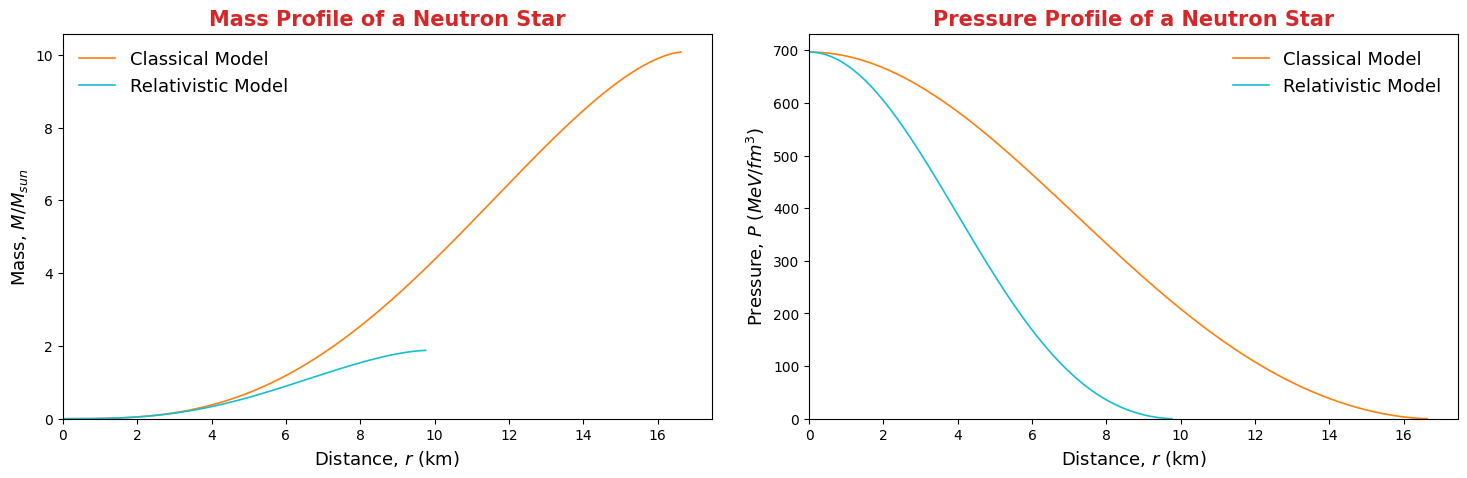

In [ ]:
'''Using RK4 Numerical Method for modeling a neutron star'''
plt.figure(figsize = (18, 5))                                   # setting up the figure size for subplots
for k in range(0,2):                                            # k will take two values in this run --> 0 and 1
    flag = flag_set[k]                                          # flag_set[0] = 0, flag_set[1] = 1
    for i in range(0,N-1):                                      # for 1500 iterations
        if flag == 0:                                           # if the flag is set to 0
            [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag) # use classical model
        else:                                                   # if not 0
            [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag) # use relativistic model
        if p[i+1] < tol:                                        # if the value of the pressure goes below tolerance (close to 0 as we know)
            break                                               # the simulation is completed
    print()                                                     # for a new line between outputs
    if i == N-2:                                                # if the pressure value was not able to go below the tolerance value
        lbl1 = "Program didn't converge to P = 0, extend the maximum value of r" # print to increase the itetarations of simulation --> values of r
    else:                                                       # if simulation stopped before this
        lbl1 = f"P < {tol} found after {i} runs"                # print the conclusion statement

    '''Keep only the used indices of array discarding the remaining ones'''
    m = m[:i+2] # m[0:i+2 --> Exclusive index]
    p = p[:i+2]
    r = r[:i+2]

    '''Time to visualise and print the results'''
    if flag == 0:
        lbl = "Classical Model"
        plot_data('tab:orange', "Classical Model")
    else:
        lbl = "Relativistic Model"
        plot_data('tab:cyan', "Relativistic Model")

    '''Printing the overall output'''
    print ("==================================================================")
    print (lbl, "Results:", lbl1)
    print ("==================================================================")
    print ("Initial density, rho_s = ", rho_s, "MeV/fm^3")
    print ("Total mass = ", m[-1]*M0/Ms, "times Solar mass")
    print ("Radius of the Neutron star = ", r[-1]*R0*1e-18, "km")

print()
plt.subplots_adjust(wspace = 0.15)

## Conclusion <a name = 'h7'><a>
- The values obtained for the mass and radius of the neutron star using the relativistic model are consistent with what is expected for a neutron star.

- However, the values you obtained using the classical model are not consistent with what is expected for a neutron star.

- Therefore, a non-relativistic model is not a good approximation for describing the properties of neutron stars, and a relativistic model is necessary to accurately predict the mass and other properties of neutron stars.